In [1]:
library(dplyr)
RF_output<-read.csv("varImp_rffit_cecum_features_WT_15_INF_UNINF.csv")
head(RF_output)

Warning message:
"package 'dplyr' was built under R version 3.6.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,X,MeanDecreaseAccuracy
,<fct>,<dbl>
1,X141.958_0.22,0.0000
2,X228.195_2.62,0.0000
3,X113.963_0.22,0.0000
4,X404.206_2.67,1.0005
5,X343.294_2.64,0.0000
6,X409.161_2.66,-1.0005


In [3]:
# select those that met cutoff
MeanDecrease_bigger_than_1 <- RF_output$MeanDecreaseAccuracy > 1

# Use the logical vector to subset the DataFrame
selected_rows <- RF_output[MeanDecrease_bigger_than_1, ]
head(selected_rows)
dim(selected_rows)

,X,MeanDecreaseAccuracy
,<fct>,<dbl>
4,X404.206_2.67,1.000500
13,X226.179_2.52,1.000500
27,X520.508_3.87,1.869003
34,X373.273_2.58,1.926193
35,X267.122_2.67,1.000500
51,X355.262_2.58,3.225082


[1] 254   2

In [4]:
getwd()

[1] "C:/Users/Laura-Isobel_PC/Documents/projects as faculty/Toxoplasma/Mahbobeh Toxo stuff/11-07-2022_random_forest_after_BER/cecum/RF_result_file"

In [5]:
features<-read.csv("C:/Users/Laura-Isobel_PC/Documents/projects as faculty/Toxoplasma/Mahbobeh Toxo stuff/11-07-2022_random_forest_after_BER/cecum/cecum_0deleted_waveICA_bacheffect_removed.csv")
head(features)

columns_to_keep<-selected_rows$X
sig_by_RF <- features %>%
  select(all_of(columns_to_keep))
dim(selected_rows)
dim(features)
dim(sig_by_RF)
head(sig_by_RF)
#number of columns in sig_by_RF should match with the number of rows in selected_rows

,sample.id,injection_order,organ_content,Mouse_nu,Days.post.infection,Condition,genotypes,gen_con_DPI,Box.,Tissue.Collection.Date,...,X361.272_3.25,X560.31_2.95,X828.536_3.22,X774.525_3.35,X796.509_3.35,X800.576_3.58,X180.101_2.55,X435.989_0.27,X477.212_1.27,X432.241_2.44
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cecum_30_15_INFECTED_IL1R_INF_3_10_14_2021_3_181_F4,42,cecum,30,15,INFECTED,IL1R_INF,IL1R_INF_15,3,10_14_2021,...,-204937.81,-408356.0,-1250658.6,-619475.9,-828838.8,-5498457,-513512.4,-63419.21,-747435.0,136075.7
2,cecum_25_15_INFECTED_WT_INF_2_10_14_2021_2_181_A4,47,cecum,25,15,INFECTED,WT_INF,WT_INF_15,2,10_14_2021,...,451252.35,-468746.1,-2665310.6,-1320181.1,-1766359.7,-11717904,-1094359.4,-135154.31,-1592878.0,345928.7
3,QC_cecum_2_2,66,QC_cecum,QC_cecum,QC_cecum,QC_cecum,QC_cecum,QC_cecum_QC_cecum,QC_cecum,QC_cecum,...,623643.16,3757598.7,13769113.4,6820114.5,9125092.9,60535215,5653509.5,698213.20,8228878.4,446548.1
4,cecum_11_15_UNINFECTED_WT_UNINF_3_10_7_2021_13_179_C4,69,cecum,11,15,UNINFECTED,WT_UNINF,WT_UNINF_15,3,10_7_2021,...,398453.84,-439949.1,-2456651.7,-1216828.2,-1628076.8,-10800545,-1008685.4,-124573.50,-1468176.4,364113.4
5,cecum_26_15_INFECTED_IL1R_INF_2_10_14_2021_2_181_B4,85,cecum,26,15,INFECTED,IL1R_INF,IL1R_INF_15,2,10_14_2021,...,88110.26,-346980.0,-1532435.7,-759045.7,-1015578.7,-6737276,-629208.2,-77707.75,-915834.3,263542.4
6,cecum_22_15_INFECTED_IL1R_INF_1_10_14_2021_1_180_F4,96,cecum,22,15,INFECTED,IL1R_INF,IL1R_INF_15,1,10_14_2021,...,-112387.05,-219328.3,-667583.3,-330667.2,-442422.1,-2934997,-274105.4,-33852.25,-398969.9,176754.8


[1] 254   2

[1]   61 2882

[1]  61 254

,X404.206_2.67,X226.179_2.52,X520.508_3.87,X373.273_2.58,X267.122_2.67,X355.262_2.58,X524.37_2.91,X204.123_0.3,X482.323_2.88,X256.299_5.56,...,X398.558_2.24,X385.535_2.16,X789.573_2.45,X833.269_2.44,X314.194_2.14,X330.263_2.78,X324.289_2.95,X349.199_2.6,X714.505_3.61,X750.541_3.6
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,228378754,4357396.1,67699682,764819247,29453757,293024734,64267361,487068946,127776557,15889347,...,-213004.48,973.7614,80621.349,82417.605,-179648.49,-1235931,94824.75,54553.41,-141574.1,5042526
2,188102975,3687762.9,178050429,828666980,22943032,312952338,6091063560,658314534,4248615612,-4340208,...,110153.47,274633.2421,-13130.354,-13422.901,-57312.49,-1607499,201685.47,-412865.51,1841301.0,10725093
3,207322271,-338029.1,41632763,220180099,26592890,510999960,-190274841,692105606,-238828897,6240913,...,208456.39,423219.2091,-92442.857,-94502.498,21682.82,11719855,270056.44,-555820.17,2512390.3,14360878
4,265073247,-630375.5,98991517,746027008,35239622,252273592,1594738396,600184344,1121414492,6329091,...,81581.99,423911.1366,-43939.370,-44918.346,36503.23,-1501848,276638.41,-445741.37,1993090.8,14710889
5,206970222,-865802.3,186259274,1153626352,26000348,482440481,2390201319,563327525,2255695059,7346211,...,-112070.94,332326.1378,8200.077,8382.776,10040.91,-1122290,245624.05,-260009.68,1128051.2,13061629
6,256261742,15326201.4,107749013,956108726,32987661,412585673,3070888898,665286900,1997927598,-4464168,...,-328078.12,134317.1274,101098.985,103351.485,-98722.69,-663183,163578.18,-135737.54,338128.9,8698649


In [8]:

sig_by_RF_wMeta<-cbind(features[1:13], sig_by_RF)
dim(sig_by_RF_wMeta)
head(sig_by_RF_wMeta)
#re-attaching metadata

[1]  61 267

,sample.id,injection_order,organ_content,Mouse_nu,Days.post.infection,Condition,genotypes,gen_con_DPI,Box.,Tissue.Collection.Date,...,X398.558_2.24,X385.535_2.16,X789.573_2.45,X833.269_2.44,X314.194_2.14,X330.263_2.78,X324.289_2.95,X349.199_2.6,X714.505_3.61,X750.541_3.6
,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,cecum_30_15_INFECTED_IL1R_INF_3_10_14_2021_3_181_F4,42,cecum,30,15,INFECTED,IL1R_INF,IL1R_INF_15,3,10_14_2021,...,-213004.48,973.7614,80621.349,82417.605,-179648.49,-1235931,94824.75,54553.41,-141574.1,5042526
2,cecum_25_15_INFECTED_WT_INF_2_10_14_2021_2_181_A4,47,cecum,25,15,INFECTED,WT_INF,WT_INF_15,2,10_14_2021,...,110153.47,274633.2421,-13130.354,-13422.901,-57312.49,-1607499,201685.47,-412865.51,1841301.0,10725093
3,QC_cecum_2_2,66,QC_cecum,QC_cecum,QC_cecum,QC_cecum,QC_cecum,QC_cecum_QC_cecum,QC_cecum,QC_cecum,...,208456.39,423219.2091,-92442.857,-94502.498,21682.82,11719855,270056.44,-555820.17,2512390.3,14360878
4,cecum_11_15_UNINFECTED_WT_UNINF_3_10_7_2021_13_179_C4,69,cecum,11,15,UNINFECTED,WT_UNINF,WT_UNINF_15,3,10_7_2021,...,81581.99,423911.1366,-43939.370,-44918.346,36503.23,-1501848,276638.41,-445741.37,1993090.8,14710889
5,cecum_26_15_INFECTED_IL1R_INF_2_10_14_2021_2_181_B4,85,cecum,26,15,INFECTED,IL1R_INF,IL1R_INF_15,2,10_14_2021,...,-112070.94,332326.1378,8200.077,8382.776,10040.91,-1122290,245624.05,-260009.68,1128051.2,13061629
6,cecum_22_15_INFECTED_IL1R_INF_1_10_14_2021_1_180_F4,96,cecum,22,15,INFECTED,IL1R_INF,IL1R_INF_15,1,10_14_2021,...,-328078.12,134317.1274,101098.985,103351.485,-98722.69,-663183,163578.18,-135737.54,338128.9,8698649


In [9]:
sig_by_RF_wMeta_WT<-droplevels(subset(sig_by_RF_wMeta, sig_by_RF_wMeta$genotypes==c("WT_INF")|sig_by_RF_wMeta$genotypes==c("WT_UNINF")))
table(sig_by_RF_wMeta$genotypes)
table(sig_by_RF_wMeta_WT$genotypes)
#make sure that you've retained all the WT


  IL1R_INF IL1R_UNINF   QC_cecum     WT_INF   WT_UNINF 
        10         10          5         16         20 


  WT_INF WT_UNINF 
      16       20 

In [11]:
# Select columns to calculate spearman correlation (from column 14 where your data starts, to the end)
columns_to_correlate <- names(sig_by_RF_wMeta_WT)[14:ncol(sig_by_RF_wMeta_WT)]

# Initialize vectors to store results
correlations <- numeric(length(columns_to_correlate))
p_values <- numeric(length(columns_to_correlate))

# Calculate spearman correlation and p-values for each pair of columns
for (i in 1:length(columns_to_correlate)) {
  colname <- columns_to_correlate[i]
  correlation_result <- cor.test(sig_by_RF_wMeta_WT$X209.091_0.47, sig_by_RF_wMeta_WT[[colname]], method = "spearman")
  correlations[i] <- correlation_result$estimate
  p_values[i] <- correlation_result$p.value
}

# Perform FDR correction on p-values
adjusted_p_values <- p.adjust(p_values, method = "fdr")

# Create a data frame to store the results
correlation_df <- data.frame(Column = columns_to_correlate, 
                             spearman_Correlation = correlations, pval=p_values,
                             Adjusted_P_Value = adjusted_p_values)

write.csv(correlation_df, "RF_output_correlated_to_kynurenine.csv", row.names=FALSE)

In [26]:
# Set the cutoff value
cutoff_value <- 0.05

# Count the number of rows in column A that exceed the cutoff
count_sig_corr <- sum(correlation_df$Adjusted_P_Value <= cutoff_value)

print(count_sig_corr)
dim(correlation_df)
ratio=100*(count_sig_corr-1)/nrow(correlation_df)
ratio
#need to do minus 1 because one of the correlated features is kynurenine itself.

[1] 103


[1] 254   4

[1] 40.15748


Call:
lm(formula = sig_by_RF_wMeta_WT$X388.222_2.14 ~ sig_by_RF_wMeta_WT$X209.091_0.47)

Residuals:
     Min       1Q   Median       3Q      Max 
-4613270 -2803146 -1500204  1271536 11756192 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       9.012e+06  8.568e+05  10.519 3.15e-12 ***
sig_by_RF_wMeta_WT$X209.091_0.47 -8.073e-02  1.946e-02  -4.147 0.000212 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3965000 on 34 degrees of freedom
Multiple R-squared:  0.3359,	Adjusted R-squared:  0.3164 
F-statistic:  17.2 on 1 and 34 DF,  p-value: 0.0002119


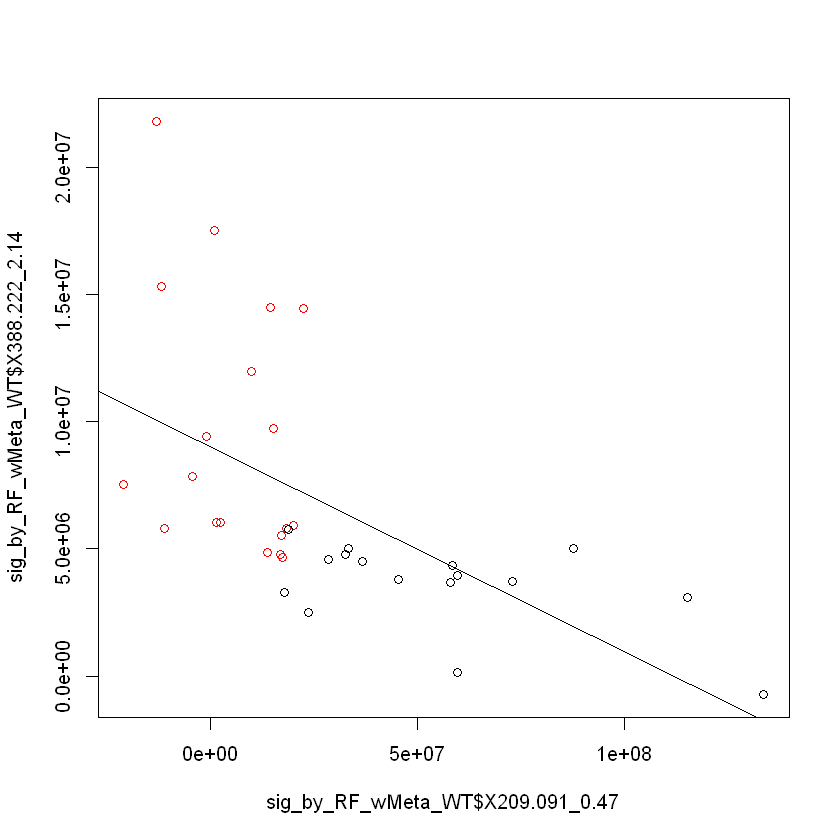

In [21]:
plot(sig_by_RF_wMeta_WT$X388.222_2.14~sig_by_RF_wMeta_WT$X209.091_0.47, col=sig_by_RF_wMeta_WT$Condition)
fit<-lm(sig_by_RF_wMeta_WT$X388.222_2.14~sig_by_RF_wMeta_WT$X209.091_0.47)
abline(fit)
summary(fit)


Call:
lm(formula = sig_by_RF_wMeta_WT$X584.206_2.03 ~ sig_by_RF_wMeta_WT$X209.091_0.47)

Residuals:
      Min        1Q    Median        3Q       Max 
-22214195  -7194683  -1677913   6506271  34281830 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       1.700e+07  2.676e+06   6.353    3e-07 ***
sig_by_RF_wMeta_WT$X209.091_0.47 -1.849e-01  6.080e-02  -3.041  0.00451 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12390000 on 34 degrees of freedom
Multiple R-squared:  0.2139,	Adjusted R-squared:  0.1908 
F-statistic:  9.25 on 1 and 34 DF,  p-value: 0.004514


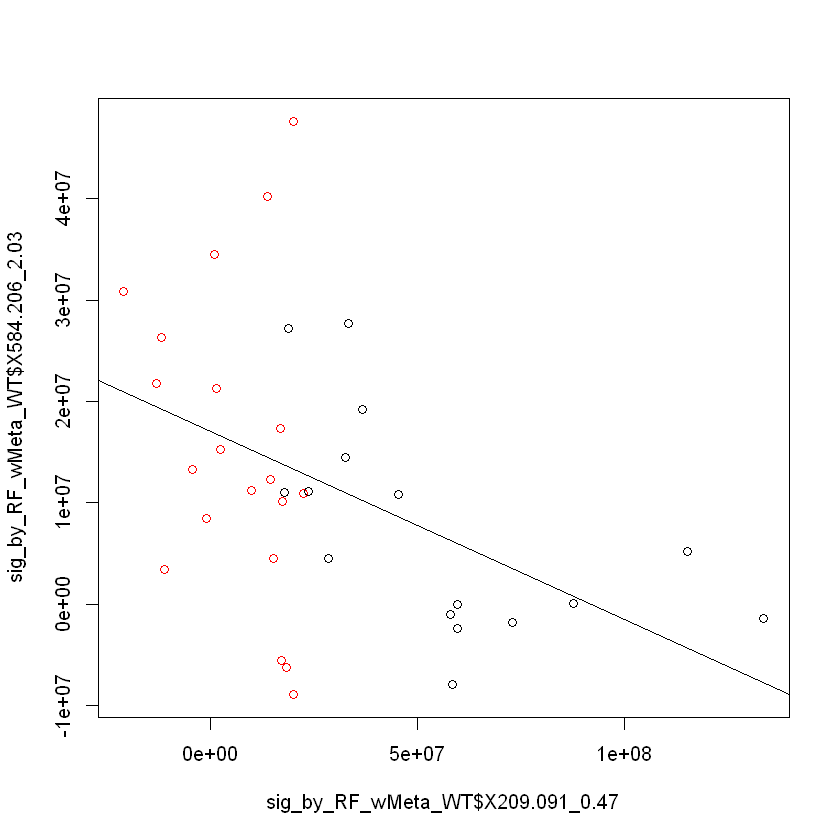

In [30]:
plot(sig_by_RF_wMeta_WT$X584.206_2.03~sig_by_RF_wMeta_WT$X209.091_0.47, col=sig_by_RF_wMeta_WT$Condition)
fit<-lm(sig_by_RF_wMeta_WT$X584.206_2.03~sig_by_RF_wMeta_WT$X209.091_0.47)
abline(fit)
summary(fit)

In [31]:
sig_by_RF_wMeta_WT_inf<-droplevels(subset(sig_by_RF_wMeta_WT, sig_by_RF_wMeta_WT$Condition==c("INFECTED")))
table(sig_by_RF_wMeta_WT$Condition)
table(sig_by_RF_wMeta_WT_inf$Condition)


  INFECTED UNINFECTED 
        16         20 


INFECTED 
      16 


Call:
lm(formula = sig_by_RF_wMeta_WT_inf$X388.222_2.14 ~ sig_by_RF_wMeta_WT_inf$X209.091_0.47)

Residuals:
     Min       1Q   Median       3Q      Max 
-3321457  -380869   450569   838806  2310453 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           5.109e+06  7.424e+05   6.881 7.55e-06 ***
sig_by_RF_wMeta_WT_inf$X209.091_0.47 -2.755e-02  1.159e-02  -2.376   0.0323 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1512000 on 14 degrees of freedom
Multiple R-squared:  0.2874,	Adjusted R-squared:  0.2365 
F-statistic: 5.647 on 1 and 14 DF,  p-value: 0.03229


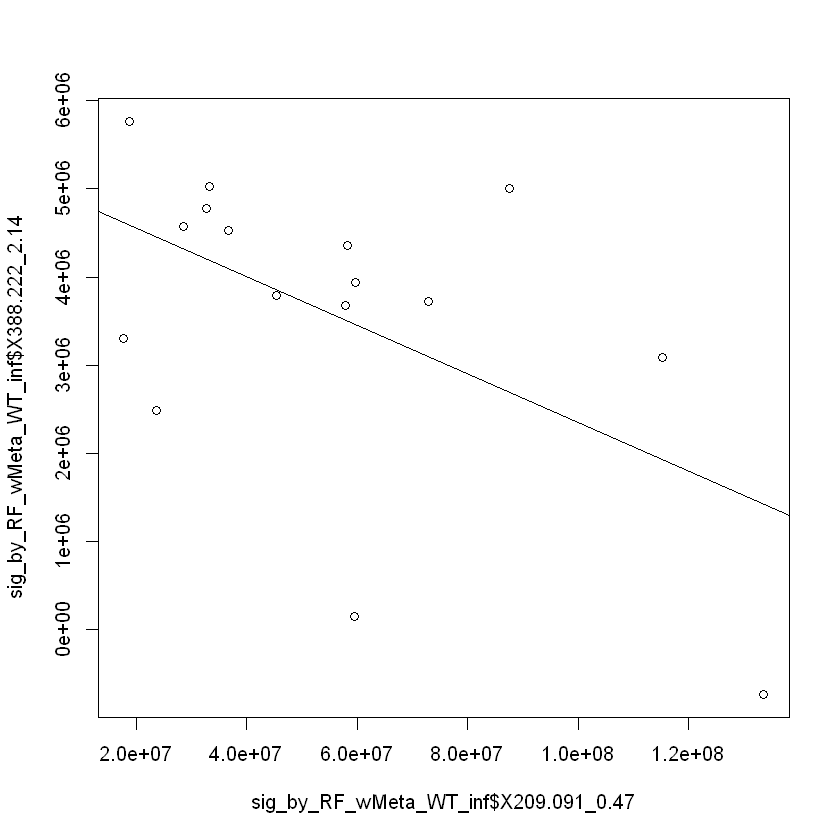

In [23]:
plot(sig_by_RF_wMeta_WT_inf$X388.222_2.14~sig_by_RF_wMeta_WT_inf$X209.091_0.47, col=sig_by_RF_wMeta_WT_inf$Condition)
fit<-lm(sig_by_RF_wMeta_WT_inf$X388.222_2.14~sig_by_RF_wMeta_WT_inf$X209.091_0.47)
abline(fit)
summary(fit)


Call:
lm(formula = sig_by_RF_wMeta_WT_inf$X584.206_2.03 ~ sig_by_RF_wMeta_WT_inf$X209.091_0.47)

Residuals:
      Min        1Q    Median        3Q       Max 
-14632588  -6754770  -1569095   6388489  16387788 

Coefficients:
                                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)                           1.742e+07  4.432e+06   3.930  0.00151 **
sig_by_RF_wMeta_WT_inf$X209.091_0.47 -1.833e-01  6.920e-02  -2.649  0.01908 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9027000 on 14 degrees of freedom
Multiple R-squared:  0.3338,	Adjusted R-squared:  0.2863 
F-statistic: 7.016 on 1 and 14 DF,  p-value: 0.01908


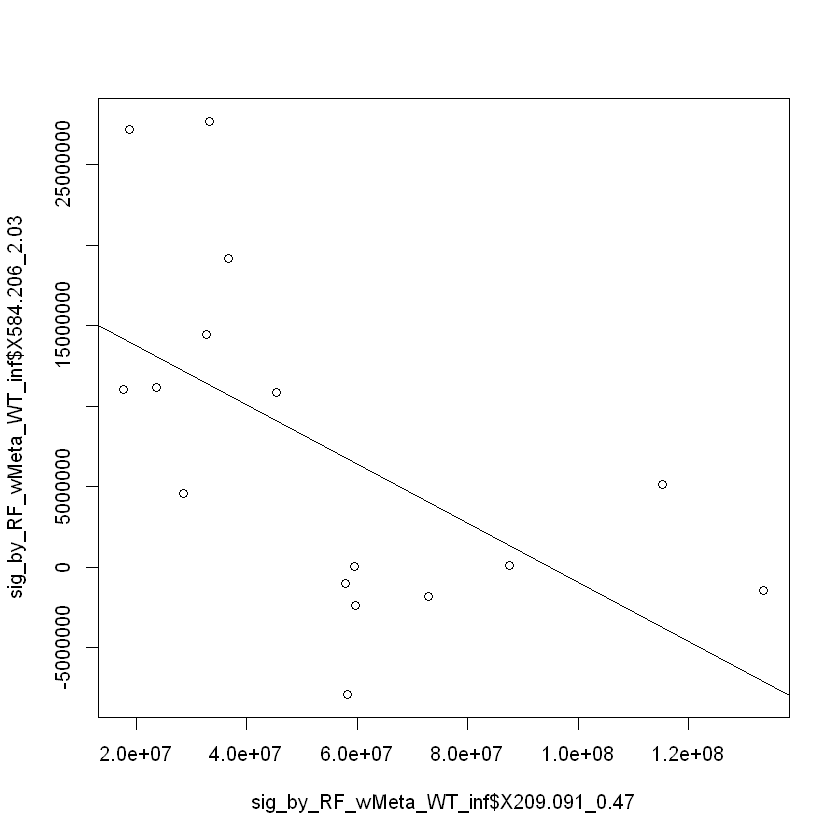

In [32]:
plot(sig_by_RF_wMeta_WT_inf$X584.206_2.03~sig_by_RF_wMeta_WT_inf$X209.091_0.47, col=sig_by_RF_wMeta_WT_inf$Condition)
fit<-lm(sig_by_RF_wMeta_WT_inf$X584.206_2.03~sig_by_RF_wMeta_WT_inf$X209.091_0.47)
abline(fit)
summary(fit)


Call:
lm(formula = sig_by_RF_wMeta_WT$X550.278_2.53 ~ sig_by_RF_wMeta_WT$X209.091_0.47)

Residuals:
     Min       1Q   Median       3Q      Max 
-3565208 -1626315  -685554  -273559 13298136 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)
(Intercept)                      -7.252e+05  8.539e+05  -0.849    0.402
sig_by_RF_wMeta_WT$X209.091_0.47 -4.617e-03  1.940e-02  -0.238    0.813

Residual standard error: 3952000 on 34 degrees of freedom
Multiple R-squared:  0.001663,	Adjusted R-squared:  -0.0277 
F-statistic: 0.05664 on 1 and 34 DF,  p-value: 0.8133


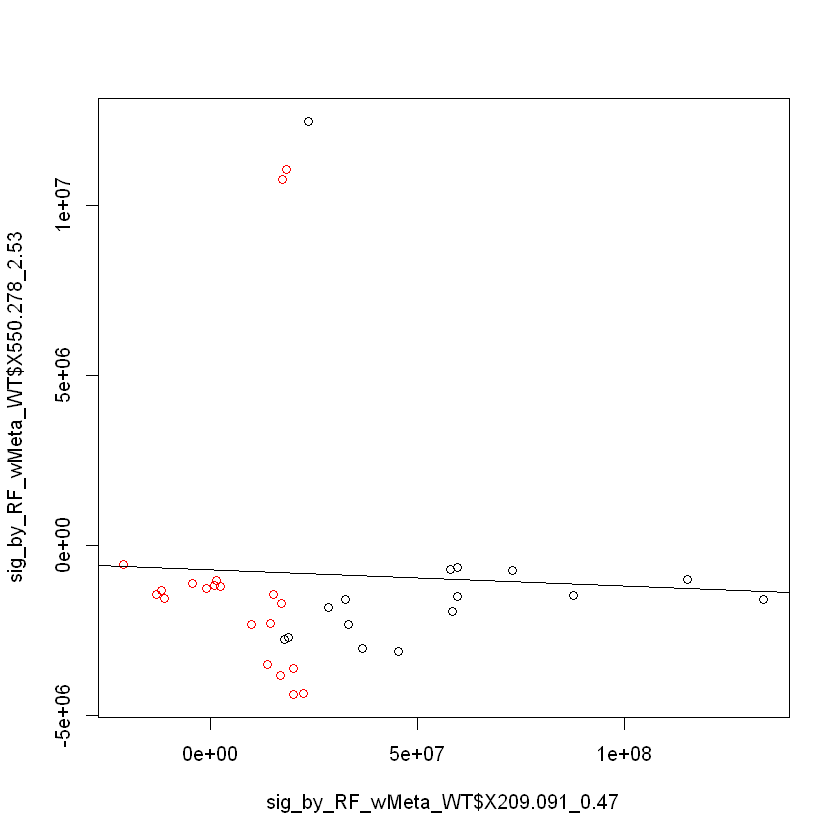

In [24]:
plot(sig_by_RF_wMeta_WT$X550.278_2.53~sig_by_RF_wMeta_WT$X209.091_0.47, col=sig_by_RF_wMeta_WT$Condition)
fit<-lm(sig_by_RF_wMeta_WT$X550.278_2.53~sig_by_RF_wMeta_WT$X209.091_0.47)
abline(fit)
summary(fit)